# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [1]:
# stundent details example: John S. 9812
# Lior Y. 8103
# (if exists)           student details 2: 
# (if exists)           student details 3: 
# (if exists&premitted) student details 4: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
AI agent name: ChatGPT o4
Goal: Evaluate and select the best classification model using K-Fold Cross Validation

Prompt1:
    "Help me build an evaluate_models function for classification models using manual Grid Search and K-Fold CV"

Prompt2:
    "Guide me in defining proper hyperparameters for models like Logistic Regression, KNN, and Decision Tree"

Prompt3:
    "Fix issues in my evaluation logic that mixed regression and classification"

Prompt4:
    "Help me visualize model performance using confusion matrix, accuracy and macro-F1 score"

Support Summary:
ChatGPT helped me implement a manual hyperparameter search using ParameterGrid and 5-fold cross-validation to compare multiple classification models.  
It also helped me resolve classification metric errors and improve result presentation (heatmap, detailed report, accuracy, macro-F1).

Regarding Logistic Regression:
ChatGPT explained how to use LogisticRegression in scikit-learn with:
- C: regularization strength
- penalty: 'l2'
- solver: 'lbfgs'


AI agent name: ChatGPT 
Goal: Creating correlation heatmap
Prompt1:
    How do I create a Pearson correlation heatmap to show feature relationships, including color gradients?
Prompt2:
    Help me explain the goal of this plot and how it helps in feature selection.
Support Summary:
ChatGPT helped me generate a seaborn.heatmap to show correlations between wine features. I used it to detect highly correlated features and their relationship with the target. I wrote the code; ChatGPT explained and adjusted it.

AI agent name: ChatGPT
Goal: Creating boxplots for class-wise feature distribution
Prompt1:
    Help me create boxplots per feature, grouped by wine quality
Prompt2:
    How to automate a loop of boxplots with seaborn.boxplot and scatter comparison per feature?
Support Summary:
ChatGPT guided me in building a for-loop that generates boxplots for all features, grouped by wine quality. It explained how to structure the subplots and annotate them. I implemented the code; ChatGPT refined the logic and helped debug errors like missing 'quality' column.
</pre>


## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>


    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
# libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, ParameterGrid
from sklearn.metrics import (
    f1_score, accuracy_score, confusion_matrix, classification_report
)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [3]:
df = pd.read_csv(r"C:\Users\Liory\Desktop\wine_data\winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
X_train = pd.read_csv(r"C:\Users\Liory\Desktop\wine_data\wine_train.csv")
X_test  = pd.read_csv(r"C:\Users\Liory\Desktop\wine_data\wine_test.csv")

Y_train = X_train['target']
Y_test  = X_test['target']

X_train = X_train.drop(columns=['target'])
X_test  = X_test.drop(columns=['target'])

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test  shape:", X_test.shape)
print("Y_test  shape:", Y_test.shape)

display(X_train.head())
display(X_test.head())
display(Y_train.head())


X_train shape: (142, 13)
Y_train shape: (142,)
X_test  shape: (36, 13)
Y_test  shape: (36,)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0


0    1
1    2
2    1
3    1
4    2
Name: target, dtype: int64

In [5]:
df.describe().T.style.background_gradient(axis=0, cmap='Oranges')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


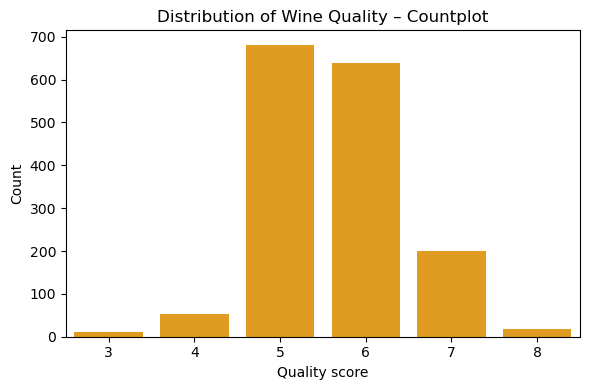

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='quality', data=df, color='orange')
plt.title('Distribution of Wine Quality – Countplot')
plt.xlabel('Quality score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

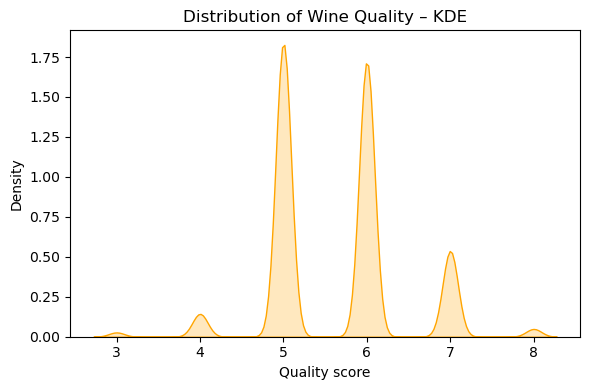

In [7]:
plt.figure(figsize=(6, 4))
sns.kdeplot(df['quality'], fill=True, bw_adjust=0.5, color='orange')
plt.title('Distribution of Wine Quality – KDE')
plt.xlabel('Quality score')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

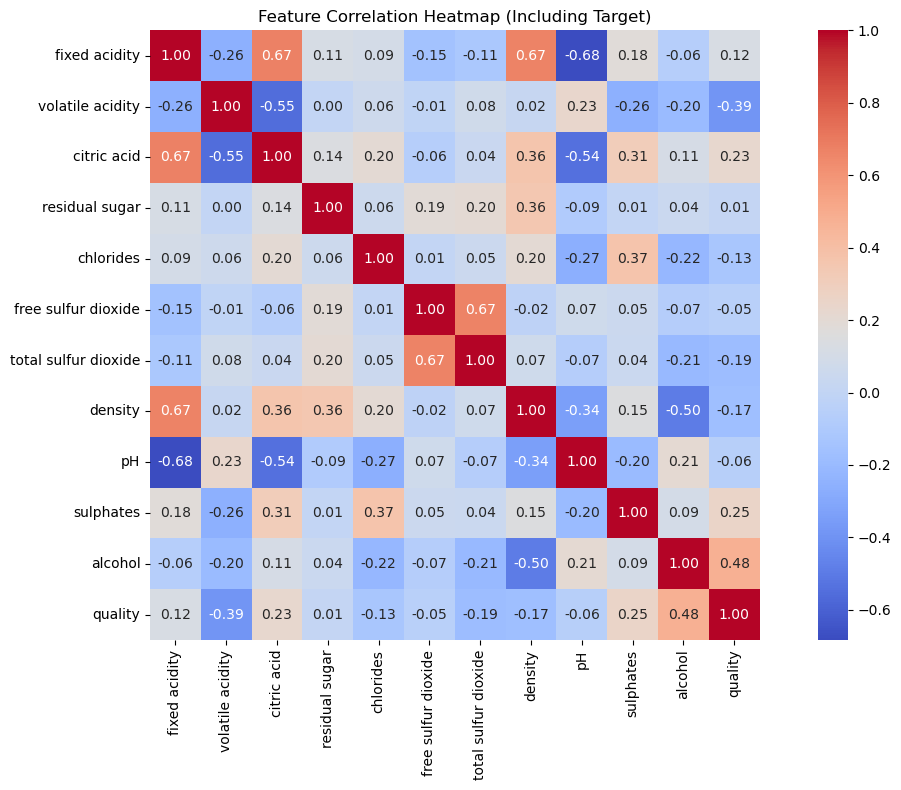

In [8]:
# Heatmap: Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap (Including Target)")
plt.tight_layout()
plt.show()

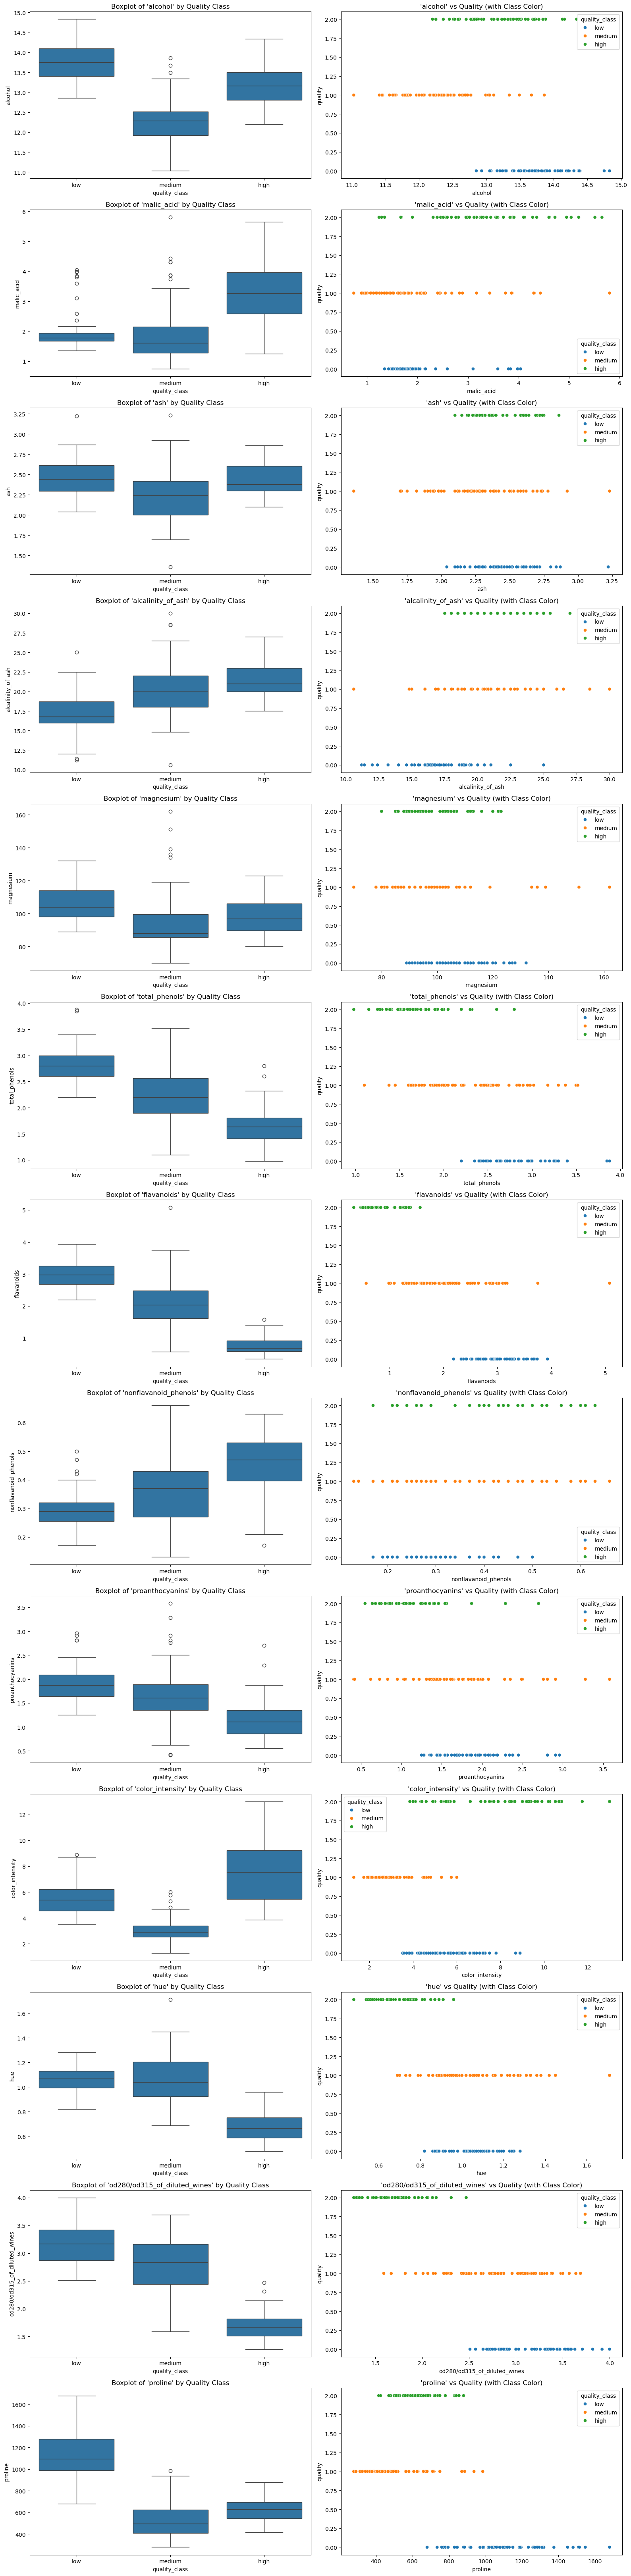

In [9]:
from sklearn.datasets import load_wine

wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)

df['quality'] = wine.target  

def quality_class(q):
    if q == 0:
        return 'low'
    elif q == 1:
        return 'medium'
    else:
        return 'high'

df['quality_class'] = df['quality'].apply(quality_class)

feature_cols = [col for col in df.columns if col not in ['quality', 'quality_class']]

fig, ax = plt.subplots(len(feature_cols), 2, figsize=(16, 5 * len(feature_cols)))
plt.subplots_adjust(hspace=0.5)

for i, feature in enumerate(feature_cols):
    sns.boxplot(x='quality_class', y=feature, data=df, ax=ax[i, 0])
    ax[i, 0].set_title(f"Boxplot of '{feature}' by Quality Class")

    sns.scatterplot(x=feature, y='quality', hue='quality_class', data=df, ax=ax[i, 1])
    ax[i, 1].set_title(f"'{feature}' vs Quality (with Class Color)")

plt.tight_layout()
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [10]:
def train_linear_regression(
    X_train, y_train,
    degree: int = 1,
    interaction_only: bool = False,
    k: int | str = 'all',
    fit_intercept: bool = True,
    positive: bool = False
):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=degree,
                                    interaction_only=interaction_only,
                                    include_bias=False)),
        ('select', SelectKBest(score_func=f_regression, k=k)),
        ('reg', LinearRegression(fit_intercept=fit_intercept,
                                 positive=positive))
    ])
    pipeline.fit(X_train, y_train)
    return pipeline

In [11]:
def train_knn(
    X_train, y_train,
    n_neighbors: int = 5,
    weights: str = 'uniform',
    p: int = 2,
    algorithm: str = 'auto',
    leaf_size: int = 30
):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsRegressor(
            n_neighbors=n_neighbors,
            weights=weights,
            metric='minkowski',
            p=p,
            algorithm=algorithm,
            leaf_size=leaf_size
        ))
    ])
    pipeline.fit(X_train, y_train)
    return pipeline

In [12]:
def train_decision_tree(
    X_train, y_train,
    criterion: str = 'squared_error',
    max_depth: int | None = None,
    min_samples_split: int = 2,
    min_samples_leaf: int = 1,
    max_features: int | float | str | None = None,
    random_state: int = 42
):

    model = DecisionTreeRegressor(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=random_state
    )
    model.fit(X_train, y_train)
    return model

In [13]:
def train_logistic(X_train, y_train, **kwargs):
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(max_iter=2000, random_state=42, **kwargs))
    ])
    return pipe.fit(X_train, y_train)
# (Logistic Regression):
#
#  ברגרסיה לוגיסטית היא מודל לסיווג (מתאימה לבעיות סיווג) המטרה שלה היא לנבא הסתברות שהחיזוי שלה שייך למחלקה מסוימת באמצעות פונקציית סיגמאוד .
#  כלומר לדוגמה האם הניבוי שייך למחלקה 1 או 0 (לרוב בבעיה בינארית).
#
# שלבי הפעולה:
# 1. המודל מחשב ציון לינארי: z = w0 + w1*x1 + w2*x2 + ... + wn*xn
# 2. מעביר את הציון דרך פונקציית סיגמואיד (sigmoid) כדי לקבל הסתברות:
#       y_hat = 1 / (1 + e^(-z))
# 3. אם ההסתברות > 0.5 → סיווג למחלקה 1, אחרת למחלקה 0

In [14]:
train_funcs = {
    'LogisticRegression': train_logistic,
    'KNN': train_knn,
    'DecisionTree': train_decision_tree,
    'LinearRegression': train_linear_regression
}


In [15]:
param_grids = {
# C        - שליטה על עוצמת הרגולריזציה (קטן = רגולריזציה חזקה יותר).
# penalty  - סוג הרגולריזציה: 'l2' מענישה משקלים גדולים (Ridge).
# solver   - אלגוריתם לפתרון האופטימיזציה:
#            'lbfgs' מהיר ויעיל ל-l2, מתאים לרוב המקרים.
   
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'DecisionTree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'LinearRegression': {
        'degree': [1, 2, 3],
        'reg__fit_intercept': [True, False],
        'reg__positive': [False, True]
    }
}


In [16]:
def evaluate_models(
    train_funcs: dict[str, callable],
    param_grids: dict[str, dict],
    X: pd.DataFrame,
    y: pd.Series,
    cv: int = 5,
    scoring: str = 'f1_macro',
    verbose: bool = False
) -> tuple[pd.DataFrame, str, dict, object, float]:

    y = y.astype(int)

    records = []
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)

    for name, train_func in train_funcs.items():
        if name not in param_grids:
            continue
        for params in ParameterGrid(param_grids[name]):
            fold_scores = []
            failed = False

            for train_idx, val_idx in kf.split(X):
                X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
                y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

                try:
                    model = train_func(X_tr, y_tr, **params)
                    y_pred = model.predict(X_val)
                    score = f1_score(y_val, y_pred, average='macro')
                    fold_scores.append(score)
                except Exception as e:
                    if verbose:
                        print(f"Error in {name} | params: {params} | {e}")
                    failed = True
                    break

            if failed:
                continue

            mean_score = np.mean(fold_scores)
            std_score = np.std(fold_scores)

            records.append({
                'model': name,
                'params': params,
                'mean_test_score (%)': round(mean_score * 100, 2),
                'std_test_score (%)': round(std_score * 100, 2)
            })

    results_df = pd.DataFrame(records)
    results_df.index.name = 'Rank'
    results_df = results_df.sort_values(by="mean_test_score (%)", ascending=False).reset_index(drop=True)

    best_row = results_df.loc[0]
    best_name = best_row['model']
    best_params = best_row['params']
    best_score = best_row['mean_test_score (%)'] / 100
    best_model = train_funcs[best_name](X, y, **best_params)

    print("\n Evaluation Results:")
    display(results_df)

    print("\n Best Model:")
    print(f"Model  : {best_name}")
    print(f"Score  : {best_score * 100:.2f}%")
    print(f"Params : {best_params}")

    return results_df, best_name, best_params, best_model, best_score

In [17]:
def get_scoring_function(scoring: str, y_true, y_pred):
    target_type = type_of_target(y_true)

    if scoring == 'f1_macro':
        if target_type in ['binary', 'multiclass']:
            return lambda yt, yp: f1_score(yt, yp, average='macro')
    elif scoring == 'accuracy':
        if target_type in ['binary', 'multiclass']:
            return accuracy_score
    elif scoring == 'r2':
        return r2_score
    elif scoring == 'mse':
        return mean_squared_error
    elif scoring == 'mae':
        return mean_absolute_error

In [18]:
def is_higher_better(scoring: str) -> bool:
    return scoring in ['f1_macro', 'accuracy', 'r2']

In [19]:
results_df, best_name, best_params, best_model, best_score = evaluate_models(
    train_funcs, param_grids, X_train, Y_train, cv=5, scoring='f1_macro'  
)


 Evaluation Results:


,model,params,mean_test_score (%),std_test_score (%)
0,LogisticRegression,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",97.66,3.02
1,LogisticRegression,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",97.54,2.03
2,LogisticRegression,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",96.41,2.36
3,LogisticRegression,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",96.18,2.37



 Best Model:
Model  : LogisticRegression
Score  : 97.66%
Params : {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [20]:
train_funcs = {
    'LogisticRegression': train_logistic,
    'KNN': train_knn,
    'DecisionTree': train_decision_tree
}

param_grids = {
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'DecisionTree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
}

results_df, best_name, best_params, best_model, best_score = evaluate_models(
    train_funcs=train_funcs,
    param_grids=param_grids,
    X=X_train,
    y=Y_train,
    cv=5,
    scoring='f1_macro'
)



 Evaluation Results:


,model,params,mean_test_score (%),std_test_score (%)
0,LogisticRegression,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",97.66,3.02
1,LogisticRegression,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",97.54,2.03
2,LogisticRegression,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",96.41,2.36
3,LogisticRegression,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",96.18,2.37



 Best Model:
Model  : LogisticRegression
Score  : 97.66%
Params : {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


## Part 5 - Apply on test and show model performance estimation

First 5 predictions on test set:
[2 0 2 1 2]


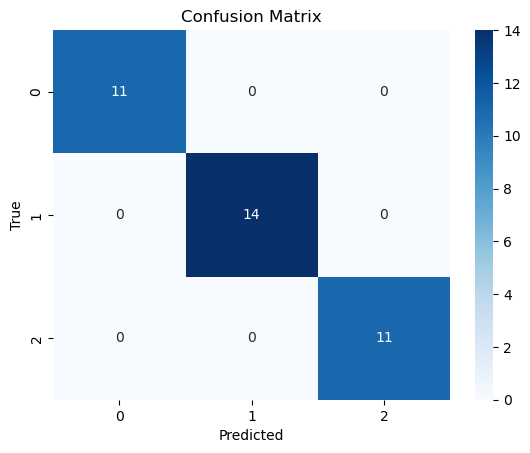


Test Set Macro-F1 Score: 1.000


In [21]:
y_pred = best_model.predict(X_test)

print("First 5 predictions on test set:")
print(y_pred[:5])

test_macro_f1 = f1_score(Y_test, y_pred, average='macro')

cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print(f"\nTest Set Macro-F1 Score: {test_macro_f1:.3f}")
